In [1]:
import pandas as pd
import numpy as np

# Data #1: List of Fairfax County Cities and Zip Codes

In [7]:
Fairfax_city_list = pd.read_csv('https://opendata.arcgis.com/datasets/3111976184004077b836f535f31eadf1_21.csv')

In [8]:
Fairfax_city_list = Fairfax_city_list[['ZIPCITY','ZIPCODE','Creator']]
Fairfax_city_list.rename(columns={"ZIPCITY": "City", "ZIPCODE": "Zip Code", "Creator": "County"}, inplace = True)
Fairfax_city_list

,City,Zip Code,County
0,RESTON,20190,FairfaxCounty
1,MCLEAN,22101,FairfaxCounty
2,CLIFTON,20124,FairfaxCounty
3,ALEXANDRIA,22308,FairfaxCounty
4,HERNDON,20170,FairfaxCounty
...,...,...,...
75,FAIRFAX,22031,FairfaxCounty
76,GREAT FALLS,22066,FairfaxCounty
77,BURKE,22009,FairfaxCounty
78,MCLEAN,22106,FairfaxCounty


In [9]:
Fairfax_city_list = Fairfax_city_list.sort_values(by = ['Zip Code']).reset_index(drop = True)
Fairfax_city_list

,City,Zip Code,County
0,CENTREVILLE,20120,FairfaxCounty
1,CENTREVILLE,20121,FairfaxCounty
2,CENTREVILLE,20122,FairfaxCounty
3,CLIFTON,20124,FairfaxCounty
4,CHANTILLY,20151,FairfaxCounty
...,...,...,...
75,ALEXANDRIA,22309,FairfaxCounty
76,ALEXANDRIA,22310,FairfaxCounty
77,ALEXANDRIA,22311,FairfaxCounty
78,ALEXANDRIA,22312,FairfaxCounty


# Data #2: Fairfax County Home Values

In [10]:
House_data_zip = pd.read_csv(r'Zillow data_zip.csv', names = ['Zip Code', 'M-o-M', 'Q-o-Q', 'Y-o-Y', 'House Value Index'])
House_data_zip = House_data_zip[['Zip Code', 'Y-o-Y', 'House Value Index']]
House_data_zip

,Zip Code,Y-o-Y,House Value Index
0,20105,4%,"$661,141"
1,20109,5%,"$309,583"
2,20110,4%,"$348,495"
3,20111,5%,"$354,128"
4,20112,3%,"$498,343"
...,...,...,...
195,24540,2%,"$85,696"
196,24541,2%,"$86,045"
197,24551,4%,"$290,065"
198,24572,3%,"$154,990"


### Merge House data by zip code into Fairfax_city_list

In [11]:
City = []
Zip = []
Yearly_growth = []
House_Value_index = []
County = []

for a in range(80):
    for b in range(200):
        if Fairfax_city_list.loc[a, 'Zip Code'] == House_data_zip.loc[b, 'Zip Code']:
            City.append(Fairfax_city_list.loc[a, 'City'])
            Zip.append(Fairfax_city_list.loc[a, 'Zip Code'])
            Yearly_growth.append(House_data_zip.loc[b, 'Y-o-Y'])
            House_Value_index.append(House_data_zip.loc[b, 'House Value Index'])
            County.append(Fairfax_city_list.loc[a, 'County'])

Fairfax_city_list1 = pd.DataFrame(list(zip(Zip, City, Yearly_growth, House_Value_index, County)), columns = ['Zip Code','City','Yearly Growth Rate','House Value Index','County'])
Fairfax_city_list1               

,Zip Code,City,Yearly Growth Rate,House Value Index,County
0,20120,CENTREVILLE,4%,"$506,854",FairfaxCounty
1,20121,CENTREVILLE,5%,"$417,424",FairfaxCounty
2,20151,CHANTILLY,4%,"$582,431",FairfaxCounty
3,20152,CHANTILLY,4%,"$595,783",FairfaxCounty
4,20164,STERLING,5%,"$428,953",FairfaxCounty
5,20170,HERNDON,4%,"$518,025",FairfaxCounty
6,20171,HERNDON,4%,"$643,871",FairfaxCounty
7,20190,RESTON,4%,"$446,958",FairfaxCounty
8,20191,RESTON,4%,"$488,935",FairfaxCounty
9,22003,ANNANDALE,4%,"$587,067",FairfaxCounty


### Get the house data by city name

In [12]:
House_data_city = pd.read_csv(r'Zillow data_city.csv')
House_data_city = House_data_city[['City', 'Y-o-Y', 'Value Index']]
House_data_city

,City,Y-o-Y,Value Index
0,Abingdon,3%,"$180,062"
1,Aldie,4%,"$680,279"
2,Alexandria,6%,"$551,395"
3,Amelia Court House,5%,"$206,705"
4,Amherst,3%,"$187,228"
...,...,...,...
196,Woodford,4%,"$207,276"
197,Woodstock,4%,"$212,549"
198,Wytheville,1%,"$139,639"
199,Yorkshire,4%,"$334,983"


### Merge House_data_zip and House_data_city dataframe into Fairfax_city_list

#### Change City column to uppercase letters

In [13]:
House_data_city['City'] = House_data_city['City'].str.upper()
House_data_city

,City,Y-o-Y,Value Index
0,ABINGDON,3%,"$180,062"
1,ALDIE,4%,"$680,279"
2,ALEXANDRIA,6%,"$551,395"
3,AMELIA COURT HOUSE,5%,"$206,705"
4,AMHERST,3%,"$187,228"
...,...,...,...
196,WOODFORD,4%,"$207,276"
197,WOODSTOCK,4%,"$212,549"
198,WYTHEVILLE,1%,"$139,639"
199,YORKSHIRE,4%,"$334,983"


In [14]:
City = []
Zip = []
Yearly_growth = []
Value_index = []
County = []

for a in range(80):
    for b in range(201):
        if Fairfax_city_list.loc[a, 'City'] == House_data_city.loc[b, 'City']:
            City.append(Fairfax_city_list.loc[a, 'City'])
            Zip.append(Fairfax_city_list.loc[a, 'Zip Code'])
            Yearly_growth.append(House_data_city.loc[b, 'Y-o-Y'])
            Value_index.append(House_data_city.loc[b, 'Value Index'])
            County.append(Fairfax_city_list.loc[a, 'County'])

Fairfax_city_list2 = pd.DataFrame(list(zip(Zip, City, Yearly_growth, Value_index, County)), columns = ['Zip Code','City','Yearly Growth Rate','House Value Index','County'])
Fairfax_city_list2               

,Zip Code,City,Yearly Growth Rate,House Value Index,County
0,20120,CENTREVILLE,4%,"$457,286",FairfaxCounty
1,20121,CENTREVILLE,4%,"$457,286",FairfaxCounty
2,20122,CENTREVILLE,4%,"$457,286",FairfaxCounty
3,20124,CLIFTON,3%,"$727,546",FairfaxCounty
4,20151,CHANTILLY,4%,"$590,897",FairfaxCounty
...,...,...,...,...,...
67,22309,ALEXANDRIA,6%,"$551,395",FairfaxCounty
68,22310,ALEXANDRIA,6%,"$551,395",FairfaxCounty
69,22311,ALEXANDRIA,6%,"$551,395",FairfaxCounty
70,22312,ALEXANDRIA,6%,"$551,395",FairfaxCounty


#### add the missing cities in Fairfax_city_list1 from Fairfax_city_list2

In [15]:
Fairfax_city_list1['City'].unique()

array(['CENTREVILLE', 'CHANTILLY', 'STERLING', 'HERNDON', 'RESTON',
       'ANNANDALE', 'BURKE', 'FAIRFAX', 'FALLS CHURCH', 'GREAT FALLS',
       'LORTON', 'MCLEAN', 'OAKTON', 'SPRINGFIELD', 'VIENNA', 'ARLINGTON',
       'ALEXANDRIA'], dtype=object)

In [16]:
Fairfax_city_list2['City'].unique()

array(['CENTREVILLE', 'CLIFTON', 'CHANTILLY', 'STERLING', 'HERNDON',
       'RESTON', 'ANNANDALE', 'BURKE', 'FAIRFAX', 'FALLS CHURCH',
       'FORT BELVOIR', 'GREAT FALLS', 'LORTON', 'MCLEAN', 'MOUNT VERNON',
       'OAKTON', 'SPRINGFIELD', 'VIENNA', 'ARLINGTON', 'ALEXANDRIA'],
      dtype=object)

#### missing cities are Clifton, Mount Vernon, Fort Belvoir

In [17]:
A = Fairfax_city_list2.loc[Fairfax_city_list2['City'] == 'CLIFTON']
B = Fairfax_city_list2.loc[Fairfax_city_list2['City'] == 'MOUNT VERNON']
C = Fairfax_city_list2.loc[Fairfax_city_list2['City'] == 'FORT BELVOIR']

In [18]:
df_fairfax_merged = pd.concat([Fairfax_city_list1, A, B, C], axis = 0)
df_fairfax_merged = df_fairfax_merged.sort_values(by = ['Zip Code']).reset_index(drop = True)
# move column "Couty" to the left
df_fairfax_masterlist = df_fairfax_merged[['Zip Code', 'City', 'County', 'House Value Index','Yearly Growth Rate']]
df_fairfax_masterlist['County'].replace('FairfaxCounty','Fairfax County', inplace = True)
df_fairfax_masterlist

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Zip Code,City,County,House Value Index,Yearly Growth Rate
0,20120,CENTREVILLE,Fairfax County,"$506,854",4%
1,20121,CENTREVILLE,Fairfax County,"$417,424",5%
2,20124,CLIFTON,Fairfax County,"$727,546",3%
3,20151,CHANTILLY,Fairfax County,"$582,431",4%
4,20152,CHANTILLY,Fairfax County,"$595,783",4%
5,20164,STERLING,Fairfax County,"$428,953",5%
6,20170,HERNDON,Fairfax County,"$518,025",4%
7,20171,HERNDON,Fairfax County,"$643,871",4%
8,20190,RESTON,Fairfax County,"$446,958",4%
9,20191,RESTON,Fairfax County,"$488,935",4%


# Data #3: Population

In [19]:
df_pop = pd.read_csv('https://www.fairfaxcounty.gov/gisapps/iplsmap/IPLSExport.ashx?Type=Z&Year=2019&Param=ALL')
df_pop

,ZIPCODE,YEAR,POPULATION,POP_5YEAR,LAND_AREA,TOTAL_HU,SFD,SFA,MF_LOW,MF_MID,...,HOUSEHOLDS,HU_30UP,HU_LT30,VALUE_LOW,VALUE_MID,VALUE_HIGH,TOTAL_GFA,OFFICE_GFA,RETAIL_GFA,INDUST_GFA
0,22067,2019,166,166,240.191,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22203,2019,322,322,2.751,150,0,0,100,50,...,147,100,50,0,0,0,0,0,0,0
2,20153,2019,0,0,0.571,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22124,2019,18983,19005,6627.592,6656,4194,1445,1017,0,...,6588,5035,1617,1564,3555,1396,1124879,759785,365094,0
4,22180,2019,27859,28059,3663.452,10110,6068,1165,1550,1068,...,9906,6685,3422,974,5609,1343,5404450,2645195,2386729,372526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,22310,2019,29621,29779,4346.939,10990,5653,3046,2291,0,...,10886,8146,2838,6036,3696,69,3954006,1846254,1098543,1009209
80,20164,2019,0,0,4.971,0,0,0,0,0,...,0,0,0,0,0,0,65746,0,65746,0
81,20172,2019,0,0,0.376,0,0,0,0,0,...,0,0,0,0,0,0,13808,0,0,13808
82,20171,2019,53320,58742,7560.957,19071,8225,3887,6360,599,...,18871,6161,12903,4145,8047,548,15724302,9254680,4535589,1934033


In [20]:
df_pop_clean = df_pop[['ZIPCODE','POPULATION']]
df_pop_clean.sort_values(by = ['ZIPCODE'], ignore_index = True)

,ZIPCODE,POPULATION
0,20120,43440
1,20121,30680
2,20121,11
3,20122,0
4,20124,16062
...,...,...
79,22309,34736
80,22310,29621
81,22311,1675
82,22312,23788


In [21]:
# merge same zip code rows
df_pop_clean = df_pop_clean.groupby('ZIPCODE').sum().reset_index()
# rename column "ZIPCODE" to "Zip Code", "POPULATION" to "Population"
df_pop_clean.columns = ['Zip Code', 'Population']  
df_pop_clean

,Zip Code,Population
0,20120,43440
1,20121,30691
2,20122,0
3,20124,16062
4,20151,22451
...,...,...
75,22309,34736
76,22310,29621
77,22311,1675
78,22312,23788


# Data #4: Income

In [22]:
import requests
import io

In [23]:
r = requests.get('http://www.livehealthyfairfax.org/indicators/index/indicatorcsv?indicatorId=15&localeTypeId=3&localeFilterId=0')

In [24]:
file_object = io.StringIO(r.content.decode('utf-8'))
df_income = pd.read_csv(file_object)
df_income

,Indicator Name,What Is This Indicator,Location Type,Location,Indicator Rate Value,Indicator Rate Value Units,Rate Lower Confidence Interval,Rate Upper Confidence Interval,Indicator Count Value,Indicator Count Value Units,...,Breakout Rate Value,Breakout Rate Value Units,Breakout Rate Lower Confidence Interval,Breakout Rate Upper Confidence Interval,Breakout Count Value,Breakout Count Value Units,Breakout Count Lower Confidence Interval,Breakout Count Upper Confidence Interval,Breakout Unstable,Breakout Footer
0,Per Capita Income,This indicator shows the per capita income.,Zip Code,20120,50160,dollars,48134,52186,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Per Capita Income,This indicator shows the per capita income.,Zip Code,20120,48183,dollars,46541,49825,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Per Capita Income,This indicator shows the per capita income.,Zip Code,20120,49100,dollars,46542,51658,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Per Capita Income,This indicator shows the per capita income.,Zip Code,20120,48409,dollars,45968,50850,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Per Capita Income,This indicator shows the per capita income.,Zip Code,20120,47530,dollars,45104,49956,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Per Capita Income,This indicator shows the per capita income.,Zip Code,22315,53970,dollars,51564,56376,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Per Capita Income,This indicator shows the per capita income.,Zip Code,22315,56469,dollars,54051,58887,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,Per Capita Income,This indicator shows the per capita income.,Zip Code,22315,55764,dollars,52882,58646,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,Per Capita Income,This indicator shows the per capita income.,Zip Code,22315,55100,dollars,52177,58023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# clean up the dataframe and rename the needed columns
df_income = df_income[['Location', 'Indicator Rate Value']]
df_income.columns = ['Zip Code', 'Per Capita Income']
df_income

,Zip Code,Per Capita Income
0,20120,50160
1,20120,48183
2,20120,49100
3,20120,48409
4,20120,47530
...,...,...
339,22315,53970
340,22315,56469
341,22315,55764
342,22315,55100


In [26]:
# merge columns with same zip codes and calculate average per capita income for each zip code
df_income_clean = df_income.groupby('Zip Code').mean().round(0).reset_index()
df_income_clean['Per Capita Income'] = df_income_clean['Per Capita Income'].astype(int)
df_income_clean['Per Capita Income'] = df_income_clean['Per Capita Income'].apply('${:,}'.format) 
df_income_clean

,Zip Code,Per Capita Income
0,20120,"$47,632"
1,20121,"$37,923"
2,20124,"$62,148"
3,20151,"$45,317"
4,20170,"$44,008"
5,20171,"$56,554"
6,20190,"$59,136"
7,20191,"$52,784"
8,20194,"$75,537"
9,22003,"$39,934"


# Data #5: Crime Data

In [27]:
crime_data = pd.read_csv('https://www.fairfaxcounty.gov/apps/pfsu/api/file/crimereportsfromsp', header = None)
crime_data = crime_data[[6, 8]]
crime_data.columns = ['City', 'Zip Code']

In [28]:
crime_data.shape

(1236, 2)

In [29]:
crime_data.dropna(inplace = True)    # drop NaN values
crime_data.reset_index(inplace = True)
crime_data.shape

(1233, 3)

####  remove decimal place of the zip code column to zero

In [30]:
import math

In [31]:
zip_list = []  
for i in range(1153):
    zip_list.append(math.floor(crime_data['Zip Code'][i]))

In [32]:
city_list = list(crime_data['City'])

In [33]:
df_crime_clean = pd.DataFrame(zip(city_list, zip_list), columns = ['City', 'Zip Code'])
df_crime_clean

,City,Zip Code
0,GREAT FALLS,22066
1,ALEXANDRIA,22306
2,ALEXANDRIA,22306
3,SPRINGFIELD,22151
4,FAIRFAX,22030
...,...,...
1148,CENTREVILLE,20121
1149,ALEXANDRIA,22312
1150,CENTREVILLE,20121
1151,CENTREVILLE,20121


In [34]:
# count the total crime 
df_crime_clean[['Total Crime #']] = df_crime_clean.groupby(['Zip Code']).transform('count') 

In [35]:
df_crime_clean

,City,Zip Code,Total Crime #
0,GREAT FALLS,22066,22
1,ALEXANDRIA,22306,60
2,ALEXANDRIA,22306,60
3,SPRINGFIELD,22151,22
4,FAIRFAX,22030,29
...,...,...,...
1148,CENTREVILLE,20121,50
1149,ALEXANDRIA,22312,26
1150,CENTREVILLE,20121,50
1151,CENTREVILLE,20121,50


In [36]:
# remove the duplicate rows, reorder by zip code, and clean up
df_crime_clean.drop_duplicates(subset = 'Zip Code', keep = 'first', inplace = True) 
df_crime_clean = df_crime_clean.sort_values(by = 'Zip Code')
df_crime_clean.reset_index(drop = True, inplace = True)
df_crime_clean

,City,Zip Code,Total Crime #
0,CENTREVILLE,20120,37
1,CENTREVILLE,20121,50
2,CLIFTON,20124,24
3,CHANTILLY,20151,25
4,HERNDON,20170,15
5,HERNDON,20171,35
6,RESTON,20190,27
7,RESTON,20191,36
8,HERNDON,20192,1
9,RESTON,20194,21


# Data #6: School Quality Data

#### find Fairfax County Public School ratings by zip code in the Fairfax_master_list dataframe

In [37]:
# get the entire zip codes from Fairfax_master_list
df_fairfax_masterlist['Zip Code'].unique()

array([20120, 20121, 20124, 20151, 20152, 20164, 20170, 20171, 20190,
       20191, 22003, 22015, 22030, 22031, 22032, 22033, 22041, 22042,
       22043, 22046, 22060, 22066, 22079, 22101, 22102, 22121, 22124,
       22150, 22152, 22153, 22180, 22182, 22203, 22204, 22205, 22206,
       22207, 22302, 22303, 22304, 22306, 22309, 22310, 22311, 22312,
       22315])

In [38]:
# import the spreadsheet pulled from the school rating website
school_data = pd.read_excel(r'School List.xlsx')
school_data

,Zip Code,Rank (of 1102),School,Grades,District,# Students,Student/,Free/Disc Lunch,Average Standard Score (2019),Rank (2018),Rank Change from 2018
0,NaN,NaN,NaN,NaN,NaN,NaN,Teacher Ratio,Recipients,NaN,NaN,NaN
1,20120.0,194.0,Cardinal Ridge Elementary,"PK, KG-5",Loudoun County Public Schools,858.0,17.5,0.084,78.3,198.0,4
2,20120.0,227.0,Powell Elementary,"PK, KG-6",Fairfax County Public Schools,910.0,14.9,0.16,76.0,224.0,-3
3,20120.0,430.0,Cub Run Elementary,"PK, KG-6",Fairfax County Public Schools,571.0,14.9,0.145,64.2,254.0,-176
4,20120.0,802.0,Virginia Run Elementary,"PK, KG-6",Fairfax County Public Schools,681.0,14.6,0.391,36.3,689.0,-113
...,...,...,...,...,...,...,...,...,...,...,...
160,22312.0,975.0,Parklawn Elementary,"PK, KG-5",Fairfax County Public Schools,679.0,12.3,0.817,19.9,878.0,-97
161,22312.0,1074.0,Weyanoke Elementary,"PK, KG-5",Fairfax County Public Schools,553.0,13.7,0.808,4.6,988.0,-86
162,22315.0,384.0,Island Creek Elementary,"PK, KG-6",Fairfax County Public Schools,821.0,14.5,0.1,66.9,286.0,-98
163,22315.0,448.0,Lane Elementary,"PK, KG-6",Fairfax County Public Schools,746.0,14.7,0.193,63.4,413.0,-35


In [39]:
# remove the first row NaN and other irrelevant columns
school_data = school_data.iloc[:,[0,2,8]].drop(0)   
school_data.head(10)

,Zip Code,School,Average Standard Score (2019)
1,20120.0,Cardinal Ridge Elementary,78.3
2,20120.0,Powell Elementary,76.0
3,20120.0,Cub Run Elementary,64.2
4,20120.0,Virginia Run Elementary,36.3
5,20120.0,Deer Park Elementary,34.7
6,20120.0,London Towne Elementary,27.2
7,20121.0,Bull Run Elementary,48.0
8,20121.0,Centreville Elementary,43.5
9,20121.0,Centre Ridge Elementary,15.8
10,20124.0,Union Mill Elementary,76.5


#### group the dataset by zip code

In [40]:
school_data.groupby('Zip Code').count().shape

(46, 2)

In [41]:
# calculate the average school scores after grouping by zip code
df_score = school_data.groupby('Zip Code').mean().round(2)
df_score.head()

,Average Standard Score (2019)
Zip Code,
20120.0,52.78
20121.0,35.77
20124.0,76.50
20151.0,57.85
20152.0,70.13


In [42]:
# put the scores in a list
score_list = list(df_score.iloc[:,0])
score_list

[52.78,
 35.77,
 76.5,
 57.85,
 70.13,
 30.74,
 21.18,
 72.72,
 34.7,
 51.65,
 59.15,
 75.3,
 47.5,
 84.6,
 71.43,
 72.82,
 51.35,
 24.44,
 69.6,
 52.95,
 22.6,
 81.35,
 53.87,
 85.58,
 89.1,
 nan,
 82.9,
 41.25,
 70.98,
 63.17,
 62.96,
 79.32,
 26.0,
 39.87,
 85.23,
 36.63,
 87.56,
 47.53,
 14.35,
 42.6,
 21.9,
 16.36,
 52.98,
 17.43,
 25.63,
 63.4]

In [43]:
# get the all the School names
school_list = school_data.groupby('Zip Code')['School'].apply(list)
df_school_list = pd.DataFrame(school_list).reset_index()
df_school_list.head()

,Zip Code,School
0,20120.0,"[Cardinal Ridge Elementary, Powell Elementary,..."
1,20121.0,"[Bull Run Elementary, Centreville Elementary, ..."
2,20124.0,[Union Mill Elementary]
3,20151.0,"[Poplar Tree Elementary, Brookfield Elementary]"
4,20152.0,"[Little River Elementary, Liberty Elementary, ..."


In [44]:
df_school_list.shape

(46, 2)

In [45]:
# remove decimal place of zip codes to zero and remove the square brackets [] around school names under School column
zip_list0 = []  
school_list0 = []
for i in range(46):
    zip_list0.append(math.floor(df_school_list['Zip Code'][i]))
    school_list0.append(str(df_school_list['School'][i]).strip('[]').replace("'",""))

In [46]:
# put together a new and clean School dataframe
df_school = pd.DataFrame(list(zip(zip_list0, school_list0, score_list)), columns = ['Zip Code', 'Elem School', 'Average Elem School Score (2019)'])
df_school

,Zip Code,Elem School,Average Elem School Score (2019)
0,20120,"Cardinal Ridge Elementary, Powell Elementary, ...",52.78
1,20121,"Bull Run Elementary, Centreville Elementary, C...",35.77
2,20124,Union Mill Elementary,76.50
3,20151,"Poplar Tree Elementary, Brookfield Elementary",57.85
4,20152,"Little River Elementary, Liberty Elementary, H...",70.13
5,20164,"Meadowland Elementary, Forest Grove Elementary...",30.74
6,20170,"Clearview Elementary, Dranesville Elementary, ...",21.18
7,20171,"Oak Hill Elementary, Floris Elementary, Fox Mi...",72.72
8,20190,"Forest Edge Elementary, Lake Anne Elementary",34.70
9,20191,"Sunrise Valley Elementary, Hunters Woods Eleme...",51.65


# Put all dataframes together

In [47]:
df_fairfax_masterlist.shape

(46, 5)

In [48]:
df_pop_clean.shape

(80, 2)

In [49]:
df_income_clean.shape

(43, 2)

In [50]:
df_crime_clean.shape

(48, 3)

In [51]:
df_school.shape

(46, 3)

In [52]:
# merge data with same zip code and exclude NaN values
df_merged1 = pd.merge(df_fairfax_masterlist, df_pop_clean, how = 'inner', on = 'Zip Code')
df_merged2 = pd.merge(df_merged1, df_income_clean, how = 'inner', on = 'Zip Code')
df_merged3 = pd.merge(df_merged2, df_crime_clean, how = 'inner', on = 'Zip Code')
df_merged_final = pd.merge(df_merged3, df_school, how = 'inner', on = 'Zip Code')
df_merged_final.head()

,Zip Code,City_x,County,House Value Index,Yearly Growth Rate,Population,Per Capita Income,City_y,Total Crime #,Elem School,Average Elem School Score (2019)
0,20120,CENTREVILLE,Fairfax County,"$506,854",4%,43440,"$47,632",CENTREVILLE,37,"Cardinal Ridge Elementary, Powell Elementary, ...",52.78
1,20121,CENTREVILLE,Fairfax County,"$417,424",5%,30691,"$37,923",CENTREVILLE,50,"Bull Run Elementary, Centreville Elementary, C...",35.77
2,20124,CLIFTON,Fairfax County,"$727,546",3%,16062,"$62,148",CLIFTON,24,Union Mill Elementary,76.50
3,20151,CHANTILLY,Fairfax County,"$582,431",4%,22451,"$45,317",CHANTILLY,25,"Poplar Tree Elementary, Brookfield Elementary",57.85
4,20170,HERNDON,Fairfax County,"$518,025",4%,40361,"$44,008",HERNDON,15,"Clearview Elementary, Dranesville Elementary, ...",21.18


In [53]:
# remove column "City_y" and rename "City_x" to "City"
df_merged_final.drop('City_y', axis=1, inplace=True)
df_merged_final.rename(columns={'City_x':'City'}, inplace=True) 
df_merged_final

,Zip Code,City,County,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019)
0,20120,CENTREVILLE,Fairfax County,"$506,854",4%,43440,"$47,632",37,"Cardinal Ridge Elementary, Powell Elementary, ...",52.78
1,20121,CENTREVILLE,Fairfax County,"$417,424",5%,30691,"$37,923",50,"Bull Run Elementary, Centreville Elementary, C...",35.77
2,20124,CLIFTON,Fairfax County,"$727,546",3%,16062,"$62,148",24,Union Mill Elementary,76.50
3,20151,CHANTILLY,Fairfax County,"$582,431",4%,22451,"$45,317",25,"Poplar Tree Elementary, Brookfield Elementary",57.85
4,20170,HERNDON,Fairfax County,"$518,025",4%,40361,"$44,008",15,"Clearview Elementary, Dranesville Elementary, ...",21.18
5,20171,HERNDON,Fairfax County,"$643,871",4%,53320,"$56,554",35,"Oak Hill Elementary, Floris Elementary, Fox Mi...",72.72
6,20190,RESTON,Fairfax County,"$446,958",4%,21755,"$59,136",27,"Forest Edge Elementary, Lake Anne Elementary",34.70
7,20191,RESTON,Fairfax County,"$488,935",4%,30278,"$52,784",36,"Sunrise Valley Elementary, Hunters Woods Eleme...",51.65
8,22003,ANNANDALE,Fairfax County,"$587,067",4%,57381,"$39,934",82,"Canterbury Woods Elementary, Columbia Elementa...",59.15
9,22015,BURKE,Fairfax County,"$556,615",4%,44213,"$46,771",33,"Terra Centre Elementary, Cherry Run Elementary...",75.30


In [54]:
df_merged_final.shape

(35, 10)

# Utilize Foursquare Data

In [56]:
!pip install geopy

     |████████████████████████████████| 112kB 6.0MB/s eta 0:00:01


In [57]:
from geopy.geocoders import Nominatim

In [58]:
# get all the coordinates by zip code

Lat = []
Long = []
geolocator = Nominatim(user_agent = "Test")
zip = []

for i in range(35):
    zipcode = df_merged_final.loc[i,'Zip Code']
    A = str(zipcode) + ', Virginia'
    location = geolocator.geocode(A)
    Lat.append(location.latitude)
    Long.append(location.longitude)

df_merged_final['Latitude'] = Lat
df_merged_final['Longitude'] = Long
df_merged_final.head(5)

,Zip Code,City,County,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude
0,20120,CENTREVILLE,Fairfax County,"$506,854",4%,43440,"$47,632",37,"Cardinal Ridge Elementary, Powell Elementary, ...",52.78,38.843078,-77.478514
1,20121,CENTREVILLE,Fairfax County,"$417,424",5%,30691,"$37,923",50,"Bull Run Elementary, Centreville Elementary, C...",35.77,38.836485,-77.427402
2,20124,CLIFTON,Fairfax County,"$727,546",3%,16062,"$62,148",24,Union Mill Elementary,76.50,38.820280,-77.378782
3,20151,CHANTILLY,Fairfax County,"$582,431",4%,22451,"$45,317",25,"Poplar Tree Elementary, Brookfield Elementary",57.85,38.888639,-77.443135
4,20170,HERNDON,Fairfax County,"$518,025",4%,40361,"$44,008",15,"Clearview Elementary, Dranesville Elementary, ...",21.18,38.983054,-77.369003


In [61]:
# move column Latitude and Longitutde to the left
df_merged_final = df_merged_final[['Zip Code','City','County','Latitude','Longitude','House Value Index','Yearly Growth Rate','Population','Per Capita Income','Total Crime #','Elem School','Average Elem School Score (2019)']]
df_merged_final

,Zip Code,City,County,Latitude,Longitude,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019)
0,20120,CENTREVILLE,Fairfax County,38.843078,-77.478514,"$506,854",4%,43440,"$47,632",38,"Cardinal Ridge Elementary, Powell Elementary, ...",52.78
1,20121,CENTREVILLE,Fairfax County,38.836485,-77.427402,"$417,424",5%,30691,"$37,923",51,"Bull Run Elementary, Centreville Elementary, C...",35.77
2,20124,CLIFTON,Fairfax County,38.820280,-77.378782,"$727,546",3%,16062,"$62,148",24,Union Mill Elementary,76.50
3,20151,CHANTILLY,Fairfax County,38.888639,-77.443135,"$582,431",4%,22451,"$45,317",26,"Poplar Tree Elementary, Brookfield Elementary",57.85
4,20170,HERNDON,Fairfax County,38.983054,-77.369003,"$518,025",4%,40361,"$44,008",15,"Clearview Elementary, Dranesville Elementary, ...",21.18
5,20171,HERNDON,Fairfax County,38.904368,-77.403626,"$643,871",4%,53320,"$56,554",36,"Oak Hill Elementary, Floris Elementary, Fox Mi...",72.72
6,20190,RESTON,Fairfax County,38.953155,-77.323839,"$446,958",4%,21755,"$59,136",26,"Forest Edge Elementary, Lake Anne Elementary",34.70
7,20191,RESTON,Fairfax County,38.950408,-77.352100,"$488,935",4%,30278,"$52,784",37,"Sunrise Valley Elementary, Hunters Woods Eleme...",51.65
8,22003,ANNANDALE,Fairfax County,38.839683,-77.190084,"$587,067",4%,57381,"$39,934",81,"Canterbury Woods Elementary, Columbia Elementa...",59.15
9,22015,BURKE,Fairfax County,38.788896,-77.272504,"$556,615",4%,44213,"$46,771",32,"Terra Centre Elementary, Cherry Run Elementary...",75.30


In [59]:
df_merged_final.shape

(35, 12)

#### utilize Foursquare API to explore the neighborhoods

In [60]:
from pandas.io.json import json_normalize

#### Foursquare API credentials
<details>
<summary>hidden cell</summary>
CLIENT_ID = 'VRLY0EJ141TBFU0LQYCIJ253ZLWYCDPUJA1A5AAQW3V4F3PG'
CLIENT_SECRET = 'QROHPUOXLNF1QJPDGRP2CGZ2EIDUG35B2R0MJQVMBR0A0VC4'
VERSION = '20180605'
</details>

In [62]:
# get all venue category names within 10km radius for each zip code

LIMIT = 100
radius = 15000
zip_list = []
venues_list = []

for i in range(35):
    lat = df_merged_final.loc[i, 'Latitude']
    long = df_merged_final.loc[i, 'Longitude']
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long, VERSION, radius, LIMIT)
    results = requests.get(url).json()['response']['groups'][0]['items']
    zip_list.append(df_merged_final.loc[i, 'Zip Code'])
    venues_list.append([(v['venue']['categories'][0]['name']) for v in results]) 

In [63]:
df_venue_category = pd.DataFrame(venues_list)
df_zip = pd.DataFrame(zip_list, columns = ['Zip Code'])
# merge the two dataframes
df_fairfax_venue_category = pd.concat([df_zip,df_venue_category], axis=1)
df_fairfax_venue_category

,Zip Code,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,20120,Japanese Restaurant,Park,American Restaurant,Italian Restaurant,Grocery Store,Smoothie Shop,Grocery Store,Spa,Fried Chicken Joint,...,Furniture / Home Store,Seafood Restaurant,Burger Joint,Deli / Bodega,Garden Center,Italian Restaurant,Warehouse Store,Grocery Store,Supermarket,Seafood Restaurant
1,20121,Spa,Grocery Store,American Restaurant,Bagel Shop,Italian Restaurant,Smoothie Shop,Italian Restaurant,Fried Chicken Joint,Japanese Restaurant,...,Creperie,Pet Store,Convenience Store,Burger Joint,Deli / Bodega,Noodle House,Italian Restaurant,Fast Food Restaurant,Pizza Place,Fast Food Restaurant
2,20124,Bagel Shop,Food Court,Grocery Store,Supermarket,Garden Center,Italian Restaurant,Golf Course,Seafood Restaurant,Fast Food Restaurant,...,American Restaurant,Pizza Place,Burger Joint,Japanese Restaurant,Sandwich Place,Korean Restaurant,Gym,Coffee Shop,Disc Golf,Martial Arts Dojo
3,20151,Grocery Store,Gym,Asian Restaurant,Fast Food Restaurant,Exhibit,Museum,Warehouse Store,Japanese Restaurant,Vietnamese Restaurant,...,Hotel,Residential Building (Apartment / Condo),Movie Theater,Mexican Restaurant,Golf Course,Spanish Restaurant,Ice Cream Shop,Thai Restaurant,Gym / Fitness Center,American Restaurant
4,20170,Middle Eastern Restaurant,Bagel Shop,Donut Shop,Bakery,Mediterranean Restaurant,Gym / Fitness Center,Frozen Yogurt Shop,Salon / Barbershop,Ice Cream Shop,...,Portuguese Restaurant,Movie Theater,Gym,Shopping Mall,Pizza Place,Wine Shop,Brewery,Park,Fast Food Restaurant,Fast Food Restaurant
5,20171,Wine Shop,Convenience Store,Bar,BBQ Joint,Exhibit,Fast Food Restaurant,Museum,Library,Fast Food Restaurant,...,Italian Restaurant,Seafood Restaurant,Steakhouse,Movie Theater,American Restaurant,Thai Restaurant,Smoothie Shop,Thai Restaurant,Grocery Store,Trail
6,20190,Lake,Brewery,Mediterranean Restaurant,Ice Cream Shop,Plaza,Gym / Fitness Center,Shopping Mall,Sculpture Garden,Spanish Restaurant,...,Gym,Park,Wine Shop,Brazilian Restaurant,Clothing Store,Thai Restaurant,Seafood Restaurant,Movie Theater,Bakery,Pizza Place
7,20191,Ice Cream Shop,Gym / Fitness Center,Spanish Restaurant,Plaza,Shopping Mall,Mediterranean Restaurant,Taco Place,Salad Place,Restaurant,...,Seafood Restaurant,Deli / Bodega,Coffee Shop,Martial Arts Dojo,Fast Food Restaurant,Asian Restaurant,Grocery Store,Italian Restaurant,Soup Place,Supermarket
8,22003,Food Court,American Restaurant,Bakery,Taco Place,Portuguese Restaurant,Neighborhood,Salad Place,Movie Theater,Gym,...,Furniture / Home Store,Clothing Store,Italian Restaurant,Movie Theater,Restaurant,Golf Course,Electronics Store,Diner,South American Restaurant,Poke Place
9,22015,Gym / Fitness Center,Park,Fast Food Restaurant,Coffee Shop,Grocery Store,Chinese Restaurant,Thai Restaurant,Lake,Bakery,...,Shopping Mall,Peruvian Restaurant,Garden,Food Court,Thai Restaurant,Comfort Food Restaurant,Trail,Pizza Place,Supermarket,American Restaurant


In [64]:
# count the frequency of categories for each zip code
df_count = df_fairfax_venue_category.drop('Zip Code',axis =1).apply(pd.Series.value_counts, axis=1)
df_count.sort_values(by = 0, ascending=False, axis=1) 

,Fast Food Restaurant,Seafood Restaurant,Pizza Place,Italian Restaurant,Mexican Restaurant,Grocery Store,Golf Course,American Restaurant,Cosmetics Shop,Furniture / Home Store,...,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,3.0,4.0,6.0,4.0,3.0,2.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,4.0,6.0,3.0,4.0,2.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2.0,2.0,1.0,1.0,3.0,1.0,6.0,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,3.0,3.0,3.0,4.0,NaN,5.0,2.0,3.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2.0,3.0,2.0,1.0,2.0,4.0,NaN,5.0,1.0,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
7,5.0,3.0,1.0,2.0,1.0,5.0,NaN,5.0,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.0,3.0,4.0,3.0,1.0,4.0,1.0,5.0,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
9,3.0,2.0,5.0,3.0,1.0,4.0,NaN,6.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# use one hot encoding to sort the venue category by its frequency for each zip code
df_no_zip = df_fairfax_venue_category.drop('Zip Code',axis =1)

# one hot encoding
fairfax_onehot = pd.get_dummies(df_no_zip, prefix = '', prefix_sep = '')

# add Neighborhood to the first column
zip = df_fairfax_venue_category['Zip Code']
fairfax_onehot.insert(0, 'Zip Code', zip, True)

fairfax_onehot

,Zip Code,American Restaurant,Bagel Shop,Café,Coffee Shop,Cosmetics Shop,Donut Shop,Farmers Market,Fast Food Restaurant,Food Court,...,Performing Arts Venue,Pizza Place,Poke Place,Portuguese Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Supermarket,Taco Place,Thai Restaurant,Trail
0,20120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,20121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20124,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20151,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,20171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,20190,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,20191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,22003,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9,22015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# group row by zip code and by taking mean of the frequency of occurrence of each venue category
fairfax_venue_grouped = fairfax_onehot.groupby('Zip Code').mean().reset_index()
fairfax_venue_grouped.head(3)

,Zip Code,American Restaurant,Bagel Shop,Café,Coffee Shop,Cosmetics Shop,Donut Shop,Farmers Market,Fast Food Restaurant,Food Court,...,Performing Arts Venue,Pizza Place,Poke Place,Portuguese Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Supermarket,Taco Place,Thai Restaurant,Trail
0,20120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,20121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20124,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# display top 5 venues for each zip code

# create a function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [68]:
# create a dataframe and display the top 5 venues for each zip code
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

fairfax_top_venues = pd.DataFrame(columns = columns)
fairfax_top_venues['Zip Code'] = fairfax_venue_grouped['Zip Code']

for ind in np.arange(fairfax_venue_grouped.shape[0]):
    fairfax_top_venues.iloc[ind, 1:] = return_most_common_venues(fairfax_venue_grouped.iloc[ind, :], num_top_venues)

fairfax_top_venues

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,20120,Library,Golf Course,Flower Shop,Historic Site,Italian Restaurant
1,20121,Exhibit,Mediterranean Restaurant,Mexican Restaurant,Fast Food Restaurant,Furniture / Home Store
2,20124,Coffee Shop,Italian Restaurant,Indian Restaurant,Pizza Place,Golf Course
3,20151,Pizza Place,Golf Course,Exhibit,Spanish Restaurant,Coffee Shop
4,20170,Asian Restaurant,Bakery,French Restaurant,Lake,Shopping Mall
5,20171,Trail,Coffee Shop,Airport Lounge,Brewery,Fast Food Restaurant
6,20190,Coffee Shop,Brazilian Restaurant,Coffee Shop,Bakery,Mediterranean Restaurant
7,20191,Taco Place,Fast Food Restaurant,American Restaurant,American Restaurant,Garden
8,22003,Bubble Tea Shop,Bar,Seafood Restaurant,Gym,New American Restaurant
9,22015,Afghan Restaurant,Portuguese Restaurant,American Restaurant,Grocery Store,American Restaurant


In [69]:
# merge the top venue dataframe into the master dataframe
df_final = pd.merge(df_merged_final, fairfax_top_venues, on = 'Zip Code')
df_final.head(3)

,Zip Code,City,County,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,20120,CENTREVILLE,Fairfax County,"$506,854",4%,43440,"$47,632",37,"Cardinal Ridge Elementary, Powell Elementary, ...",52.78,38.843078,-77.478514,Library,Golf Course,Flower Shop,Historic Site,Italian Restaurant
1,20121,CENTREVILLE,Fairfax County,"$417,424",5%,30691,"$37,923",50,"Bull Run Elementary, Centreville Elementary, C...",35.77,38.836485,-77.427402,Exhibit,Mediterranean Restaurant,Mexican Restaurant,Fast Food Restaurant,Furniture / Home Store
2,20124,CLIFTON,Fairfax County,"$727,546",3%,16062,"$62,148",24,Union Mill Elementary,76.50,38.820280,-77.378782,Coffee Shop,Italian Restaurant,Indian Restaurant,Pizza Place,Golf Course


# analyze and evaluate cities(by zip code) in Fairfax County

#### Analysis 1: cluster Fairfax County cities (by zip code)

In [70]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [71]:
# cluster Fairfax County cities
kclusters = 5
Fairfax_clustering = fairfax_venue_grouped.drop('Zip Code', 1)
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(Fairfax_clustering)
kmeans.labels_[0:10]

array([0, 2, 0, 3, 2, 3, 2, 0, 2, 3], dtype=int32)

In [72]:
#create a new dataframe includes the cluster as well as the top 5 venues for each city(zip code)
df_final.insert(3, 'Cluster Labels', kmeans.labels_)

In [73]:
df_final.head(3)

,Zip Code,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,20120,CENTREVILLE,Fairfax County,0,"$506,854",4%,43440,"$47,632",37,"Cardinal Ridge Elementary, Powell Elementary, ...",52.78,38.843078,-77.478514,Library,Golf Course,Flower Shop,Historic Site,Italian Restaurant
1,20121,CENTREVILLE,Fairfax County,2,"$417,424",5%,30691,"$37,923",50,"Bull Run Elementary, Centreville Elementary, C...",35.77,38.836485,-77.427402,Exhibit,Mediterranean Restaurant,Mexican Restaurant,Fast Food Restaurant,Furniture / Home Store
2,20124,CLIFTON,Fairfax County,0,"$727,546",3%,16062,"$62,148",24,Union Mill Elementary,76.50,38.820280,-77.378782,Coffee Shop,Italian Restaurant,Indian Restaurant,Pizza Place,Golf Course


In [74]:
# get Fairfax County's geograpical coordinate
address = 'Fairfax, USA'
geolocator = Nominatim(user_agent = 'Test')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Fairfax are ', latitude, longitude)

The geograpical coordinate of Fairfax are  38.8462236 -77.3063733


In [75]:
import folium

In [76]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
A = list(df_final['Latitude'])
B = list(df_final['Longitude'])
C = list(df_final['Zip Code'])
D = list(df_final['Cluster Labels'])

for i in range(35):
    label = folium.Popup(str(C[i]) + ' Cluster ' + str(D[i]), parse_html=True)
    folium.CircleMarker(
        [A[i], B[i]],
        radius=5,
        popup=label,
        color=rainbow[D[i]-1],
        fill=True,
        fill_color=rainbow[D[i]-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#### analyzing each cluster

In [77]:
# Cluster 0 
df_final.loc[df_final['Cluster Labels'] == 0]

,Zip Code,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,20120,CENTREVILLE,Fairfax County,0,"$506,854",4%,43440,"$47,632",37,"Cardinal Ridge Elementary, Powell Elementary, ...",52.78,38.843078,-77.478514,Library,Golf Course,Flower Shop,Historic Site,Italian Restaurant
2,20124,CLIFTON,Fairfax County,0,"$727,546",3%,16062,"$62,148",24,Union Mill Elementary,76.50,38.820280,-77.378782,Coffee Shop,Italian Restaurant,Indian Restaurant,Pizza Place,Golf Course
7,20191,RESTON,Fairfax County,0,"$488,935",4%,30278,"$52,784",36,"Sunrise Valley Elementary, Hunters Woods Eleme...",51.65,38.950408,-77.352100,Taco Place,Fast Food Restaurant,American Restaurant,American Restaurant,Garden
11,22031,FAIRFAX,Fairfax County,0,"$606,461",4%,34074,"$49,049",21,"Mosby Woods Elementary, Mantua Elementary, Fai...",84.60,38.864393,-77.275968,American Restaurant,Neighborhood,Seafood Restaurant,Soup Place,Thai Restaurant
15,22042,FALLS CHURCH,Fairfax County,0,"$570,645",5%,33453,"$44,372",34,"Beech Tree Elementary, Pine Spring Elementary,...",24.44,38.875781,-77.199764,Sandwich Place,Bar,American Restaurant,Theater,Bakery
22,22102,MCLEAN,Fairfax County,0,"$695,482",4%,28921,"$81,923",45,Spring Hill Elementary,89.10,38.931275,-77.203997,Wine Shop,Vietnamese Restaurant,Butcher,Neighborhood,Park
26,22153,SPRINGFIELD,Fairfax County,0,"$565,618",5%,33323,"$49,875",18,"Sangster Elementary, Newington Forest Elementa...",63.17,38.757142,-77.262515,Coffee Shop,Trail,Food Court,Pizza Place,Bakery
27,22180,VIENNA,Fairfax County,0,"$766,672",3%,27859,"$58,543",8,"Stenwood Elementary, Louise Archer Elementary,...",62.96,38.894999,-77.254909,Taco Place,Shopping Mall,Butcher,Supermarket,Thai Restaurant
30,22306,ALEXANDRIA,Fairfax County,0,"$499,905",5%,32100,"$33,044",60,"Hybla Valley Elementary, Groveton Elementary, ...",21.90,38.758644,-77.084751,Cosmetics Shop,Accessories Store,Restaurant,Park,Portuguese Restaurant


In [78]:
# Cluster 1 
df_final.loc[df_final['Cluster Labels'] == 1]

,Zip Code,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,22030,FAIRFAX,Fairfax County,1,"$598,352",3%,42543,"$45,347",29,"Willow Springs Elementary, Fairfax Villa Eleme...",47.50,38.830000,-77.315903,Food Court,Greek Restaurant,Indian Restaurant,Brazilian Restaurant,Coffee Shop
17,22046,FALLS CHURCH,Fairfax County,1,"$793,526",4%,5333,"$60,432",9,"Thomas Jefferson Elementary, Timber Lane Eleme...",52.95,38.884855,-77.166097,Park,Gym,Trail,Neighborhood,Park
21,22101,MCLEAN,Fairfax County,1,"$1,185,071",3%,30789,"$93,407",29,"Chesterbrook Elementary, Sherman Elementary, K...",85.58,38.915843,-77.150000,Art Museum,Hotel,National Park,South American Restaurant,Thai Restaurant
29,22303,ALEXANDRIA,Fairfax County,1,"$437,248",6%,16182,"$50,648",12,"Cameron Elementary, Mount Eagle Elementary",14.35,38.787532,-77.075285,Park,Theme Park Ride / Attraction,Coffee Shop,Cheese Shop,Juice Bar
33,22312,ALEXANDRIA,Fairfax County,1,"$501,081",5%,23788,"$37,036",26,"Bren Mar Park Elementary, Parklawn Elementary,...",25.63,38.817692,-77.134886,Park,Monument / Landmark,Wine Shop,BBQ Joint,Park
34,22315,ALEXANDRIA,Fairfax County,1,"$528,806",5%,28498,"$54,699",40,"Island Creek Elementary, Lane Elementary, Hayf...",63.40,38.759121,-77.159664,Park,Brewery,Fast Food Restaurant,Sandwich Place,Shopping Mall


In [79]:
# Cluster 2 
df_final.loc[df_final['Cluster Labels'] == 2]

,Zip Code,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,20121,CENTREVILLE,Fairfax County,2,"$417,424",5%,30691,"$37,923",50,"Bull Run Elementary, Centreville Elementary, C...",35.77,38.836485,-77.427402,Exhibit,Mediterranean Restaurant,Mexican Restaurant,Fast Food Restaurant,Furniture / Home Store
4,20170,HERNDON,Fairfax County,2,"$518,025",4%,40361,"$44,008",15,"Clearview Elementary, Dranesville Elementary, ...",21.18,38.983054,-77.369003,Asian Restaurant,Bakery,French Restaurant,Lake,Shopping Mall
6,20190,RESTON,Fairfax County,2,"$446,958",4%,21755,"$59,136",27,"Forest Edge Elementary, Lake Anne Elementary",34.70,38.953155,-77.323839,Coffee Shop,Brazilian Restaurant,Coffee Shop,Bakery,Mediterranean Restaurant
8,22003,ANNANDALE,Fairfax County,2,"$587,067",4%,57381,"$39,934",82,"Canterbury Woods Elementary, Columbia Elementa...",59.15,38.839683,-77.190084,Bubble Tea Shop,Bar,Seafood Restaurant,Gym,New American Restaurant
13,22033,FAIRFAX,Fairfax County,2,"$539,207",4%,40665,"$50,481",31,"Navy Elementary, Greenbriar West Elementary, L...",72.82,38.864965,-77.404055,Gym,Spa,Japanese Restaurant,Museum,Fast Food Restaurant
14,22041,FALLS CHURCH,Fairfax County,2,"$390,446",7%,27717,"$35,564",49,"Belvedere Elementary, Glen Forest Elementary",51.35,38.847229,-77.150876,American Restaurant,Café,Taco Place,Taco Place,Grocery Store
16,22043,FALLS CHURCH,Fairfax County,2,"$699,676",4%,25580,"$50,388",9,"Haycock Elementary, Lemon Road Elementary, Shr...",69.60,38.898800,-77.186142,American Restaurant,Golf Course,Italian Restaurant,Supermarket,Pizza Place
18,22060,FORT BELVOIR,Fairfax County,2,"$606,990",3%,11261,"$29,650",4,Fort Belvoir Upper,22.60,38.709850,-77.158811,Historic Site,Fast Food Restaurant,American Restaurant,Wine Shop,Sushi Restaurant
19,22066,GREAT FALLS,Fairfax County,2,"$1,136,056",0%,19431,"$93,056",22,"Forestville Elementary, Great Falls Elementary",81.35,39.013654,-77.360544,Asian Restaurant,Coffee Shop,Shopping Mall,Fried Chicken Joint,Gym
31,22309,ALEXANDRIA,Fairfax County,2,"$461,243",5%,34736,"$37,004",29,"Riverside Elementary, Washington Mill Elementa...",16.36,38.725223,-77.107354,Sushi Restaurant,BBQ Joint,Fast Food Restaurant,Pet Store,Chinese Restaurant


In [80]:
# Cluster 3
df_final.loc[df_final['Cluster Labels'] == 3]

,Zip Code,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,20151,CHANTILLY,Fairfax County,3,"$582,431",4%,22451,"$45,317",25,"Poplar Tree Elementary, Brookfield Elementary",57.85,38.888639,-77.443135,Pizza Place,Golf Course,Exhibit,Spanish Restaurant,Coffee Shop
5,20171,HERNDON,Fairfax County,3,"$643,871",4%,53320,"$56,554",35,"Oak Hill Elementary, Floris Elementary, Fox Mi...",72.72,38.904368,-77.403626,Trail,Coffee Shop,Airport Lounge,Brewery,Fast Food Restaurant
9,22015,BURKE,Fairfax County,3,"$556,615",4%,44213,"$46,771",33,"Terra Centre Elementary, Cherry Run Elementary...",75.30,38.788896,-77.272504,Afghan Restaurant,Portuguese Restaurant,American Restaurant,Grocery Store,American Restaurant
23,22124,OAKTON,Fairfax County,3,"$790,650",2%,18983,"$74,955",10,"Oakton Elementary, Waples Mill Elementary",82.90,38.896743,-77.362288,Gym,American Restaurant,Spa,Deli / Bodega,Pizza Place


In [81]:
# Cluster 4
df_final.loc[df_final['Cluster Labels'] == 4]

,Zip Code,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
12,22032,FAIRFAX,Fairfax County,4,"$628,088",4%,29317,"$49,660",18,"Wakefield Forest Elementary, Oak View Elementa...",71.43,38.837883,-77.258316,Diner,Coffee Shop,Fast Food Restaurant,Sushi Restaurant,Grocery Store
20,22079,LORTON,Fairfax County,4,"$517,581",4%,36203,"$42,645",37,"Laurel Hill Elementary, Gunston Elementary, Lo...",53.87,38.779636,-77.184847,Mediterranean Restaurant,Toy / Game Store,Italian Restaurant,Warehouse Store,Brewery
24,22150,SPRINGFIELD,Fairfax County,4,"$506,861",4%,28626,"$36,946",40,"Key Center, Springfield Estates Elementary, Fo...",41.25,38.779030,-77.187414,Coffee Shop,Brewery,Italian Restaurant,Gym / Fitness Center,Toy / Game Store
25,22152,SPRINGFIELD,Fairfax County,4,"$529,866",5%,28867,"$48,209",18,"Keene Mill Elementary, West Springfield Elemen...",70.98,38.762084,-77.215550,Bubble Tea Shop,Thai Restaurant,BBQ Joint,Salad Place,Grocery Store
28,22182,VIENNA,Fairfax County,4,"$896,903",2%,28952,"$71,029",20,"Wolftrap Elementary, Colvin Run Elementary, Ki...",79.32,38.945437,-77.266294,Restaurant,Portuguese Restaurant,Salad Place,BBQ Joint,Gym
32,22310,ALEXANDRIA,Fairfax County,4,"$517,466",5%,29621,"$50,766",39,"Clermont Elementary, Bush Hill Elementary, Fra...",52.98,38.785138,-77.155274,Waterfront,Afghan Restaurant,Theater,Park,Mediterranean Restaurant


#### Analysis 2: scatter plot

In [133]:
# data cleanup 
df_final['Per Capita Income'] = df_final['Per Capita Income'].str.replace('$','').str.replace(',', '').astype(int)
df_final['House Value Index'] = df_final['House Value Index'].str.replace('$','').str.replace(',', '').astype(int)

In [144]:
df_nor = df_final

In [151]:
# data normalization
df_nor['Population'] = df_nor['Population'].transform(lambda x: x/x.max())
df_nor['Per Capita Income'] = df_nor['Per Capita Income'].transform(lambda x: x/x.max())
df_nor['House Value Index'] = df_nor['House Value Index'].transform(lambda x: x/x.max())
df_nor['Total Crime #'] = df_nor['Total Crime #'].transform(lambda x: x/x.max())
df_nor['Average Elem School Score (2019)'] = df_nor['Average Elem School Score (2019)'].transform(lambda x: x/x.max())
df_nor.head()

,Zip Code,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,20120,CENTREVILLE,Fairfax County,0,0.427699,4%,0.757045,0.509940,0.451220,"Cardinal Ridge Elementary, Powell Elementary, ...",0.592368,38.843078,-77.478514,Library,Golf Course,Flower Shop,Historic Site,Italian Restaurant
1,20121,CENTREVILLE,Fairfax County,2,0.352235,5%,0.534863,0.405997,0.609756,"Bull Run Elementary, Centreville Elementary, C...",0.401459,38.836485,-77.427402,Exhibit,Mediterranean Restaurant,Mexican Restaurant,Fast Food Restaurant,Furniture / Home Store
2,20124,CLIFTON,Fairfax County,0,0.613926,3%,0.279918,0.665346,0.292683,Union Mill Elementary,0.858586,38.820280,-77.378782,Coffee Shop,Italian Restaurant,Indian Restaurant,Pizza Place,Golf Course
3,20151,CHANTILLY,Fairfax County,3,0.491474,4%,0.391262,0.485156,0.304878,"Poplar Tree Elementary, Brookfield Elementary",0.649270,38.888639,-77.443135,Pizza Place,Golf Course,Exhibit,Spanish Restaurant,Coffee Shop
4,20170,HERNDON,Fairfax County,2,0.437126,4%,0.703386,0.471142,0.182927,"Clearview Elementary, Dranesville Elementary, ...",0.237710,38.983054,-77.369003,Asian Restaurant,Bakery,French Restaurant,Lake,Shopping Mall


In [162]:
import matplotlib.pyplot as plt

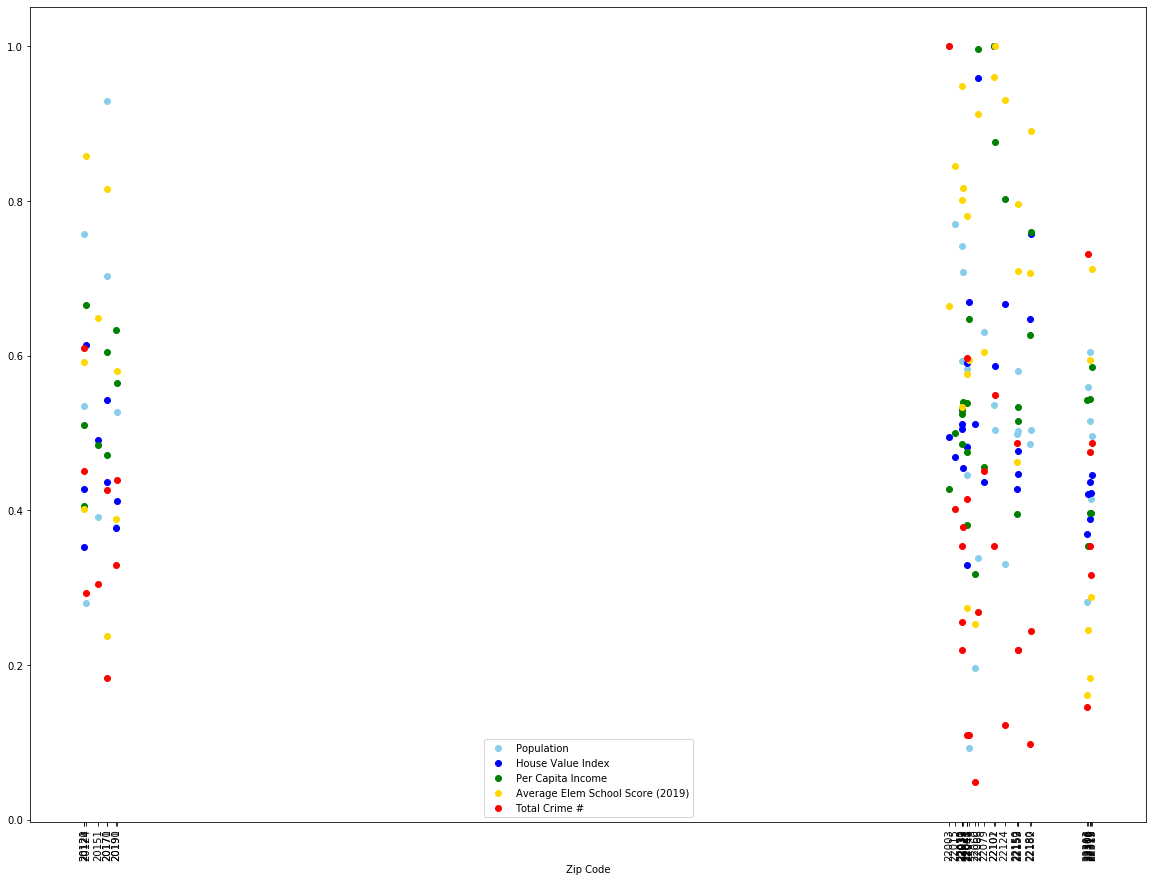

In [213]:
plt.figure(figsize=(20, 15))
plt.scatter('Zip Code', 'Population', data=df_nor, marker='o', color='skyblue')
plt.scatter('Zip Code', 'House Value Index', data=df_nor, marker='o', color='blue')
plt.scatter('Zip Code', 'Per Capita Income', data=df_nor, marker='o', color='green')
plt.scatter('Zip Code', 'Average Elem School Score (2019)', data=df_nor, marker='o', color='gold')
plt.scatter('Zip Code', 'Total Crime #', data=df_nor, marker='o', color='red')
plt.legend(loc = 'lower center')
plt.xlabel('Zip Code')
labels = list(df_nor['Zip Code'])
plt.xticks(labels, fontsize=10, rotation ='vertical') 
plt.savefig('fig.png')

#### Analysis 3: rating by weighted average

In [215]:
# data preparation
# convert crime # to negative
df_nor['Total Crime #'] = -df_nor['Total Crime #']

In [233]:
# calculate the ranking
df_nor['Rank'] = df_nor['Population'] + df_nor['Per Capita Income'] + df_nor['House Value Index'] + df_nor['Total Crime #'] + df_nor['Average Elem School Score (2019)']
df_nor.head(2)

,Zip Code,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Rank
0,20120,CENTREVILLE,Fairfax County,0,0.427699,4%,0.757045,0.509940,-0.451220,"Cardinal Ridge Elementary, Powell Elementary, ...",0.592368,38.843078,-77.478514,Library,Golf Course,Flower Shop,Historic Site,Italian Restaurant,1.835833
1,20121,CENTREVILLE,Fairfax County,2,0.352235,5%,0.534863,0.405997,-0.609756,"Bull Run Elementary, Centreville Elementary, C...",0.401459,38.836485,-77.427402,Exhibit,Mediterranean Restaurant,Mexican Restaurant,Fast Food Restaurant,Furniture / Home Store,1.084799


In [234]:
df_rank = df_nor.drop('Rank', axis = 1)
df_rank.insert(1, 'Rank', df_nor['Rank'])
df_rank.head(5)

,Zip Code,Rank,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,20120,1.835833,CENTREVILLE,Fairfax County,0,0.427699,4%,0.757045,0.509940,-0.451220,"Cardinal Ridge Elementary, Powell Elementary, ...",0.592368,38.843078,-77.478514,Library,Golf Course,Flower Shop,Historic Site,Italian Restaurant
1,20121,1.084799,CENTREVILLE,Fairfax County,2,0.352235,5%,0.534863,0.405997,-0.609756,"Bull Run Elementary, Centreville Elementary, C...",0.401459,38.836485,-77.427402,Exhibit,Mediterranean Restaurant,Mexican Restaurant,Fast Food Restaurant,Furniture / Home Store
2,20124,2.125094,CLIFTON,Fairfax County,0,0.613926,3%,0.279918,0.665346,-0.292683,Union Mill Elementary,0.858586,38.820280,-77.378782,Coffee Shop,Italian Restaurant,Indian Restaurant,Pizza Place,Golf Course
3,20151,1.712284,CHANTILLY,Fairfax County,3,0.491474,4%,0.391262,0.485156,-0.304878,"Poplar Tree Elementary, Brookfield Elementary",0.649270,38.888639,-77.443135,Pizza Place,Golf Course,Exhibit,Spanish Restaurant,Coffee Shop
4,20170,1.666438,HERNDON,Fairfax County,2,0.437126,4%,0.703386,0.471142,-0.182927,"Clearview Elementary, Dranesville Elementary, ...",0.237710,38.983054,-77.369003,Asian Restaurant,Bakery,French Restaurant,Lake,Shopping Mall


In [236]:
df_rank.sort_values(by = ['Rank'], ascending=False)

,Zip Code,Rank,City,County,Cluster Labels,House Value Index,Yearly Growth Rate,Population,Per Capita Income,Total Crime #,Elem School,Average Elem School Score (2019),Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
21,22101,3.143407,MCLEAN,Fairfax County,1,1.000000,3%,0.536571,1.000000,-0.353659,"Chesterbrook Elementary, Sherman Elementary, K...",0.960494,38.915843,-77.150000,Art Museum,Hotel,National Park,South American Restaurant,Thai Restaurant
19,22066,2.938240,GREAT FALLS,Fairfax County,2,0.958640,0%,0.338631,0.996242,-0.268293,"Forestville Elementary, Great Falls Elementary",0.913019,39.013654,-77.360544,Asian Restaurant,Coffee Shop,Shopping Mall,Fried Chicken Joint,Gym
28,22182,2.668150,VIENNA,Fairfax County,4,0.756835,2%,0.504557,0.760425,-0.243902,"Wolftrap Elementary, Colvin Run Elementary, Ki...",0.890236,38.945437,-77.266294,Restaurant,Portuguese Restaurant,Salad Place,BBQ Joint,Gym
23,22124,2.608919,OAKTON,Fairfax County,3,0.667175,2%,0.330824,0.802456,-0.121951,"Oakton Elementary, Waples Mill Elementary",0.930415,38.896743,-77.362288,Gym,American Restaurant,Spa,Deli / Bodega,Pizza Place
5,20171,2.467336,HERNDON,Fairfax County,3,0.543319,4%,0.929227,0.605458,-0.426829,"Oak Hill Elementary, Floris Elementary, Fox Mi...",0.816162,38.904368,-77.403626,Trail,Coffee Shop,Airport Lounge,Brewery,Fast Food Restaurant
22,22102,2.419160,MCLEAN,Fairfax County,0,0.586869,4%,0.504017,0.877054,-0.548780,Spring Hill Elementary,1.000000,38.931275,-77.203997,Wine Shop,Vietnamese Restaurant,Butcher,Neighborhood,Park
27,22180,2.368264,VIENNA,Fairfax County,0,0.646942,3%,0.485509,0.626752,-0.097561,"Stenwood Elementary, Louise Archer Elementary,...",0.706622,38.894999,-77.254909,Taco Place,Shopping Mall,Butcher,Supermarket,Thai Restaurant
11,22031,2.324079,FAIRFAX,Fairfax County,0,0.511751,4%,0.593820,0.525111,-0.256098,"Mosby Woods Elementary, Mantua Elementary, Fai...",0.949495,38.864393,-77.275968,American Restaurant,Neighborhood,Seafood Restaurant,Soup Place,Thai Restaurant
16,22043,2.247035,FALLS CHURCH,Fairfax County,2,0.590409,4%,0.445792,0.539446,-0.109756,"Haycock Elementary, Lemon Road Elementary, Shr...",0.781145,38.898800,-77.186142,American Restaurant,Golf Course,Italian Restaurant,Supermarket,Pizza Place
9,22015,2.183607,BURKE,Fairfax County,3,0.469689,4%,0.770516,0.500723,-0.402439,"Terra Centre Elementary, Cherry Run Elementary...",0.845118,38.788896,-77.272504,Afghan Restaurant,Portuguese Restaurant,American Restaurant,Grocery Store,American Restaurant
